<a href="https://colab.research.google.com/github/Ananya2003Gupta/MLDLS22/blob/main/Asg02%2603_MLDLS22_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep Learning Neural Network Model**

**Importing or Uploading Dataset**

In [73]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving height_and_weight.csv to height_and_weight.csv
User uploaded file "height_and_weight.csv" with length 473 bytes


In [74]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [75]:
#importing lib
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
import matplotlib.pyplot as plt


In [76]:
#loading the dataset
df= pd.read_csv('height_and_weight.csv')

**Analysis of Dataset**

In [77]:
print(df)

    Height (in cm) X  Weight (in kg) Y
0             121.92              28.0
1             124.46              28.1
2             127.00              28.2
3             129.54              28.3
4             132.08              28.4
5             134.62              28.5
6             137.16              35.2
7             139.70              37.6
8             142.24              40.0
9             144.78              42.6
10            147.32              44.9
11            149.86              47.6
12            152.40              49.9
13            154.94              52.6
14            157.48              54.9
15            160.02              57.6
16            162.56              59.9
17            165.10              62.6
18            167.64              64.8
19            170.18              67.6
20            172.72              69.8
21            175.26              72.6
22            177.80              74.8
23            180.34              77.5
24            182.88     

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Height (in cm) X  35 non-null     float64
 1   Weight (in kg) Y  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [79]:
print(df.head())

   Height (in cm) X  Weight (in kg) Y
0            121.92              28.0
1            124.46              28.1
2            127.00              28.2
3            129.54              28.3
4            132.08              28.4


In [80]:
print(df.tail())

    Height (in cm) X  Weight (in kg) Y
30            198.12              94.8
31            200.66              97.5
32            203.20              99.8
33            205.00             102.5
34            208.00             104.8


**Alloting values to X and Y from dataset**

In [81]:
X= df.iloc[:,0].values
Y= df.iloc[:,1].values

**Plotting Graph of X vs Y or Height Vs Weight**

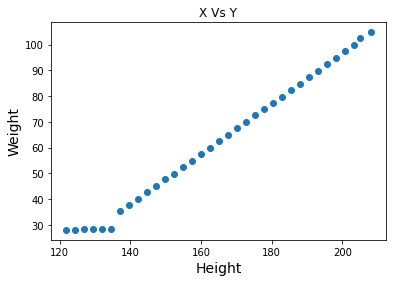

In [82]:
plt.scatter(X, Y)
plt.title('X Vs Y')
plt.xlabel('Height', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.show()

**Deep Learning Neural Networks Model**

In [83]:
xs = np.array(X, dtype=float)
ys = np.array(Y, dtype=float)

In [84]:
#defining a single layer; single neuron model
model = tf.keras.Sequential([keras.layers.Dense(units=3, activation='relu', input_shape=[1])])
model.add(Dense(1))
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 6         
                                                                 
 dense_13 (Dense)            (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


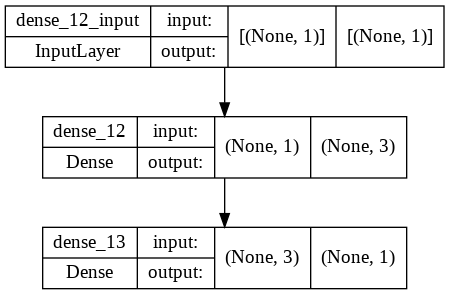

In [102]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [103]:
#defining the model evaluation for backpropogation
model.compile(optimizer='sgd', loss='mean_squared_error')

In [104]:
#taraining the model with iterations (No. of front & back propogation)
run_model = model.fit(xs, ys, epochs=700)

Epoch 1/700
2/2 [==============================] - 0s 4ms/step - loss: 608.5380
Epoch 2/700
2/2 [==============================] - 0s 3ms/step - loss: 608.2217
Epoch 3/700
2/2 [==============================] - 0s 3ms/step - loss: 607.7327
Epoch 4/700
2/2 [==============================] - 0s 3ms/step - loss: 607.7549
Epoch 5/700
2/2 [==============================] - 0s 3ms/step - loss: 608.1146
Epoch 6/700
2/2 [==============================] - 0s 3ms/step - loss: 608.4082
Epoch 7/700
2/2 [==============================] - 0s 3ms/step - loss: 608.5647
Epoch 8/700
2/2 [==============================] - 0s 4ms/step - loss: 607.9113
Epoch 9/700
2/2 [==============================] - 0s 3ms/step - loss: 607.6903
Epoch 10/700
2/2 [==============================] - 0s 4ms/step - loss: 607.4615
Epoch 11/700
2/2 [==============================] - 0s 4ms/step - loss: 607.4947
Epoch 12/700
2/2 [==============================] - 0s 4ms/step - loss: 607.3967
Epoch 13/700
2/2 [===================

In [105]:
print(model.predict([205]))
#Actual Output = 102.5

[[62.680954]]


In [106]:
# list all data in history
print(run_model.history.keys())

dict_keys(['loss'])


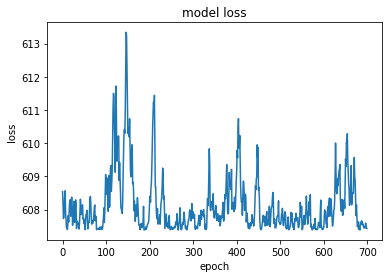

In [107]:
# summarize history for accuracy
plt.plot(run_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
